In [1]:
import warnings  #evitar warnings
import pandas as pd  #trabajar tablas y estructuras de datos
from pandas import ExcelWriter 
from pandas import ExcelFile
from pandas import datetime
from pandas import DataFrame
import numpy as np #vectores y matrices multidimensiones y operaciones complejas
import matplotlib.pyplot as plt  #para trabajar graficos
from openpyxl import Workbook #en caso de ser necesario instalar la libreria openpyxl y workbook para excel
import statsmodels.api as sm  #explorar modelos estadisticos
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose #descomposición de la serie
from sklearn.metrics import mean_squared_error, mean_absolute_error #biblioteca de aprendizaje automatico
from sklearn.model_selection import train_test_split
from math import sqrt #operaciones matematicas 
from tkinter import filedialog #tkinter trabaja ambiente grafico
import pmdarima as pm #autoarima... se debe de instalar pip install pmdarima

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta #pip install python-dateutil


<ipython-input-1-ade048c78100>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Primer código

In [4]:
warnings.filterwarnings("ignore")
#variables para cambiar en el modelo 
tiempo_pronosticar=12 #ventana de tiempo a pronosticar
tren='add' #tendencia aditiva o multiplicativa
seas='mul' #estacionalidad multiplicativa
filename =  filedialog.askopenfilename(initialdir = "/",title = "Seleccione el archivo",filetypes = (("Archivos CSV","*.xlsx"),("Todos los Archivos","*.*")))

In [5]:
df = pd.read_excel(filename, sheet_name='Farmaco') #Modificar en caso de cambiar nombre de hoja
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    60 non-null     datetime64[ns]
 1   Farmaco  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


,Fecha,Farmaco
0,2016-01-01,322
1,2016-02-01,317
2,2016-03-01,319
3,2016-04-01,323
4,2016-05-01,327
5,2016-06-01,328
6,2016-07-01,325
7,2016-08-01,326
8,2016-09-01,330
9,2016-10-01,334


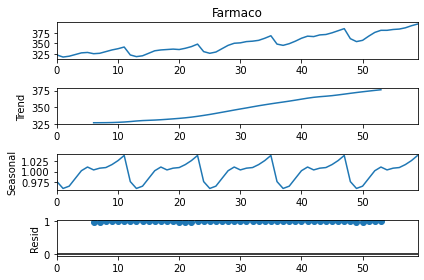

In [6]:
#descomposición de la serie de tiempo, importante la frecuencia como es por mes, 12 meses
result = seasonal_decompose(df.iloc[:, 1], model=seas, freq=12)
result.plot()
plt.show()

In [7]:
#Convertir la fecha en un formato pandas 
df.Timestamp = pd.to_datetime (df.iloc[:, 0], format = "%d/%m/%Y") #indexa la fecha, le da formato
df.index = df.Timestamp
df.head(10)

#df.iloc[:,0] tomo la primera columna, es esquivalente a decir df.FECHAS 



,Fecha,Farmaco
Fecha,,
2016-01-01,2016-01-01,322
2016-02-01,2016-02-01,317
2016-03-01,2016-03-01,319
2016-04-01,2016-04-01,323
2016-05-01,2016-05-01,327
2016-06-01,2016-06-01,328
2016-07-01,2016-07-01,325
2016-08-01,2016-08-01,326
2016-09-01,2016-09-01,330


In [8]:
#separación de set de datos, entrenamiento y test

df1=df.iloc[:, 1] #copia de la columna facturación, es equivalente a df.facturacion
#y tiene los valores de facturación
#X tiene los valores de fecha

train=df[0:int(0.9*(len(df)))] #entrenamiento
test=df[int(0.9*(len(df))):]  #test



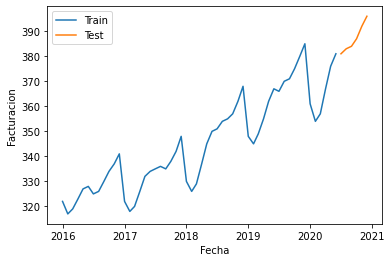

In [9]:
#Graficando la data

plt.plot(train.iloc[:, 1], label='Train') #grafica los valores de entrenamiento
plt.plot(test.iloc[:, 1], label='Test') #grafica los valores del test
plt.legend(loc='best')
plt.xlabel('Fecha') #colocar el nombre de las variables
plt.ylabel('Facturacion')
plt.show()

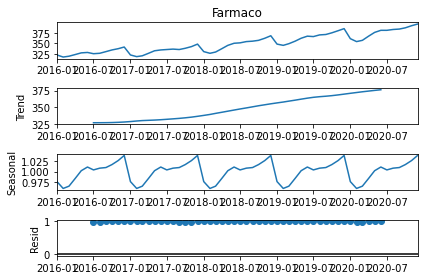

In [10]:
result = seasonal_decompose(df.iloc[:, 1], model=seas, freq=12)  #descomposición de la serie de tiempo, importante la frecuencia
result.plot()
plt.show()

In [11]:
#METODO DE HOLT-WINTERS

HW = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train.iloc[:, 1]) ,seasonal_periods=12 ,trend= tren, seasonal=seas).fit()
HW['Holt_Winter'] = fit1.forecast(len(test))

print ('Metricas de Validación HoltWinter')
print('MAPE: ',np.mean(np.abs((test.iloc[:, 1] - HW.Holt_Winter) / test.iloc[:, 1])) * 100)
print('MAE:', mean_absolute_error(test.iloc[:, 1], HW.Holt_Winter))
print('RMSE: ',sqrt(mean_squared_error(test.iloc[:, 1], HW.Holt_Winter)))
print('MSE: ',(mean_squared_error(test.iloc[:, 1], HW.Holt_Winter)))



Metricas de Validación HoltWinter
MAPE:  0.5907595063580936
MAE: 2.307991194308528
RMSE:  2.8307182756830898
MSE:  8.012965956286244


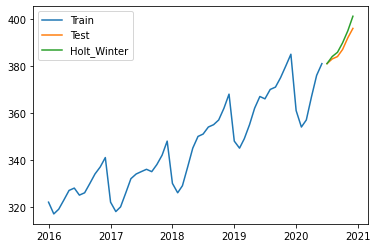

In [12]:
#GRÁFICOS HOLTWINTER
plt.plot(train.iloc[:, 1], label='Train')
plt.plot(test.iloc[:, 1], label='Test')
plt.plot(HW.Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=171.004, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=174.179, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=171.560, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=169.004, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=168.318, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=169.159, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=171.000, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=170.175, Time=0.03 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=170.147, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=170.914, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=171.949, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=169.593, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.612 seconds
                                      SARIMAX Results                                  

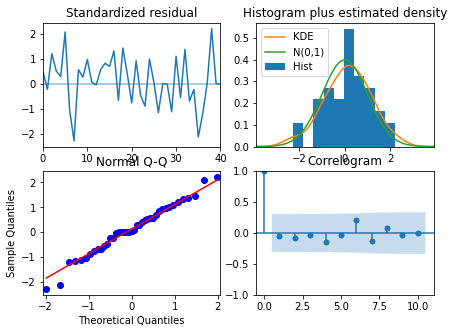

In [13]:
#MÉTODO SARIMA AUTOCALIBRACIÓN

model = pm.auto_arima(train.iloc[:, 1], start_p=1, start_q=1,
                         test='adf', #prueba test Fuller
                         max_p=9, max_q=9, m=12, #se pueden cambiar p y q #M es la frecuencia
                         start_P=0, seasonal=True, #componente estacional
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(7,5))
plt.show()


In [14]:
#PROYECCIÓN SARIMA

SA = test.copy()

model.fit(train.iloc[:, 1])
SA['SARIMA'] = model.predict(n_periods=len(test))

print ('Metricas de Validación SARIMA')
print('MAPE: ',np.mean(np.abs((test.iloc[:, 1] - SA.SARIMA) / test.iloc[:, 1])) * 100)
print('MAE:', mean_absolute_error(test.iloc[:, 1], SA.SARIMA))
print('RMSE: ',sqrt(mean_squared_error(test.iloc[:, 1], SA.SARIMA)))
print('MSE: ',(mean_squared_error(test.iloc[:, 1], SA.SARIMA)))

#METODO DE HOLT-WINTERS



Metricas de Validación SARIMA
MAPE:  0.42654953837681703
MAE: 1.6606450116985438
RMSE:  1.8191559304249072
MSE:  3.3093282992001094


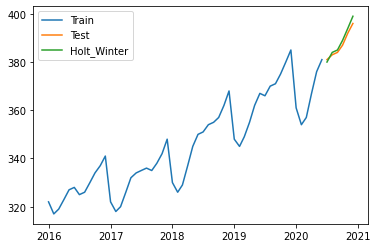

In [15]:
#GRÁFICOS SARIMA
plt.plot(train.iloc[:, 1], label='Train')
plt.plot(test.iloc[:, 1], label='Test')
plt.plot(SA.SARIMA, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [22]:
#Crear proyecciones Holtwinter

fit_1 = ExponentialSmoothing((df1) ,seasonal_periods=24 ,trend=tren, seasonal=seas).fit()
HW_forcast = fit_1.forecast(tiempo_pronosticar)
print('Proyecciones HoltWinter')
HW_forcast.head(100)

Proyecciones HoltWinter


2021-01-01    373.948921
2021-02-01    369.770170
2021-03-01    372.832610
2021-04-01    379.157085
2021-05-01    386.031893
2021-06-01    389.593531
2021-07-01    389.119958
2021-08-01    391.522558
2021-09-01    391.111303
2021-10-01    394.517056
2021-11-01    398.998290
2021-12-01    404.492998
Freq: MS, dtype: float64

In [23]:
#pronosticar Autosarima
models = pm.auto_arima(df.iloc[:, 1], start_p=1, start_q=1,
                         test='adf', #prueba test Fuller
                         max_p=9, max_q=9, m=12, #se pueden cambiar p y q #M es la frecuencia
                         start_P=0, seasonal=True, #componente estacional
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


fecha=df.index[-1]+ relativedelta(months=1)
AS_forcast2 = models.predict(n_periods=tiempo_pronosticar)
indexar_fecha = pd.date_range(fecha, periods = tiempo_pronosticar, freq='MS')
AS_forcast = pd.Series(AS_forcast2, index=indexar_fecha)
print('Proyecciones SARIMA')
AS_forcast.head(100)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=190.803, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=194.969, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=191.306, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=188.835, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=190.317, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=190.817, Time=0.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=190.811, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=189.409, Time=0.03 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=195.899, Time=0.04 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=190.798, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=190.648, Time=0.06 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=192.818, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=189.789, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]

2021-01-01    373.032895
2021-02-01    367.395780
2021-03-01    370.577641
2021-04-01    379.196722
2021-05-01    387.433680
2021-06-01    392.252212
2021-07-01    392.088620
2021-08-01    394.597611
2021-09-01    395.579420
2021-10-01    398.743037
2021-11-01    403.670455
2021-12-01    408.161022
Freq: MS, dtype: float64

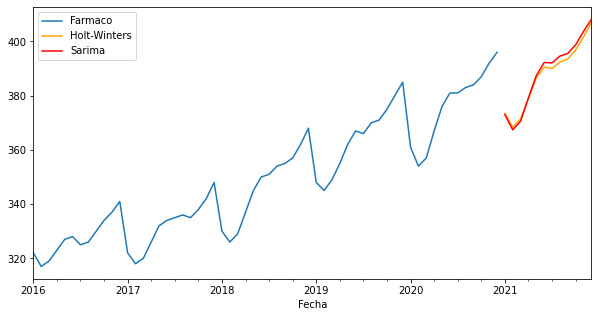

In [18]:
df1.plot(kind="line",figsize=(10,5),legend=True)
HW_forcast.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='Holt-Winters')
AS_forcast.plot(kind="line",figsize=(10,5),color='red',legend=True,label='Sarima')
plt.show()

